In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from meteostat import Point, Daily
import numpy as np

In [3]:
#utility functions
def collect_weekly_weather_data():
    start = datetime(2022, 1, 1)
    end = datetime(2022, 12, 31)
    
    # Create Point for location of business, BC
    frst_hll = Point(32.6721 , -97.2692, 70)
    
    # Create Point for Vancouver, BC
    data = Daily(frst_hll, start, end)
    data = data.fetch()
    date_range = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
    data['date'] = date_range

    
    week = data.groupby(pd.Grouper(key="date", freq="7D",origin='2022-01-01')).agg({'tavg':'mean'})
    week_reset = week.reset_index()
    # Plot line chart including average, minimum and maximum temperature
    #data.plot(y=['tavg', 'tmin', 'tmax'])
    #plt.show()
    return week_reset

In [88]:
print(collect_weekly_weather_data().keys)

<bound method NDFrame.keys of          date       tavg
0  2022-01-01   6.000000
1  2022-01-08  10.485714
2  2022-01-15   6.842857
3  2022-01-22   7.142857
4  2022-01-29   8.142857
5  2022-02-05   9.214286
6  2022-02-12  10.785714
7  2022-02-19   7.371429
8  2022-02-26  12.642857
9  2022-03-05  10.785714
10 2022-03-12  15.516667
11 2022-03-19  15.057143
12 2022-03-26  19.614286
13 2022-04-02  19.914286
14 2022-04-09  22.142857
15 2022-04-16  22.385714
16 2022-04-23  21.571429
17 2022-04-30  23.142857
18 2022-05-07  28.785714
19 2022-05-14  29.542857
20 2022-05-21  22.871429
21 2022-05-28  28.385714
22 2022-06-04  29.557143
23 2022-06-11  32.828571
24 2022-06-18  32.742857
25 2022-06-25  30.900000
26 2022-07-02  33.271429
27 2022-07-09  33.342857
28 2022-07-16  34.671429
29 2022-07-23  34.014286
30 2022-07-30  34.085714
31 2022-08-06  31.728571
32 2022-08-13  31.257143
33 2022-08-20  27.485714
34 2022-08-27  28.100000
35 2022-09-03  27.342857
36 2022-09-10  25.257143
37 2022-09-17  29.04

In [4]:

def createRangeList(start, end):
    return np.arange(start, end+1, 1)

def getEmptyCells(data_frame,column_name):
    nans = pd.isna(data_frame[column_name])
    nan_indices = []
    index_counter = 0
    for nan in nans:
        if nan == True:
            nan_indices.append(index_counter)
        index_counter = index_counter + 1
    return nan_indices

def weekly_sales_chart(scan_code,mean,week_frame,item_dict):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    description = week_frame.loc[week_frame['Scan Code'] == scan_code]['Description'].unique()[0]
    week =  [tuple[0] for tuple in item_dict[scan_code]]
    qty = np.array([tuple[1] for tuple in item_dict[scan_code]])
    total_sold = qty.sum()
    ax.set_title("Weekly Sales Chart: " + description)
    ax.bar(week,qty)
    plt.show()
    
def weekly_sales_mean_chart(item_mean_list):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    #description = week_frame.loc[week_frame['Scan Code'] == scan_code]['Description'].unique()[0]
    item =  [tuple[0] for tuple in item_mean_list]
    mean = np.array([tuple[1] for tuple in item_mean_list])
    ax.set_title("Weekly Mean of Sold Quantity of Every Item")
    plt.xlabel('Week')
    plt.ylabel('Weekly Sales Mean')
    #total_sold = qty.sum()
    #ax.set_title("Scan Code: " + str(scan_code)+ "  Description: " + description + "Sold : "+ str(total_sold))
    ax.bar(item,mean)
    plt.show()
def price_qty_chart(scan_code,week_frame,item_dict):
    
    description = week_frame.loc[week_frame['Scan Code'] == scan_code]['Description'].unique()[0]
    price =  [tuple[2] for tuple in item_dict[scan_code]]
    qty = np.array([tuple[1] for tuple in item_dict[scan_code]])
    plt.scatter(price, qty, label= "stars", color= "m",  
            marker= "*", s=30) 
    plt.xlabel('Price')
    plt.ylabel('Quantity Sold Per Week') 
    
    plt.legend() 
    plt.show()
def compare_weekly_sales(scan_code1,scan_code2,week_frame,item_dict):
#     data = [[30, 25, 50, 20],
#     [40, 23, 51, 17],
#     [35, 22, 45, 19]]
    prod_1 = list(int(tuple[1]) for tuple in item_dict[scan_code1])
    reduced_prod_1 = prod_1[:15]
    prod_2 = list(int(tuple[1]) for tuple in item_dict[scan_code2])
    reduced_prod_2 = prod_2[:15]
    width = 0.25
    r = np.arange(52)
    plt.bar(r, reduced_prod_1, color = 'b',
        width = width, edgecolor = 'black',
        label='Item1')
    plt.bar(r + width, reduced_prod_2, color = 'g',
        width = width, edgecolor = 'black',
        label='Item2')
    plt.xlabel("Week")
    plt.ylabel("Total Sales Per Week")
    plt.title("VS")
    plt.xticks(r + width/2,['1','2','3','4'])
    plt.legend()
    plt.show()


In [49]:
#the file contains transactional record starting 01/01/2022 to 29/12/2022
df = pd.read_csv('data/csv/original/sales2022.csv',dtype={'Scan Code':str})

#remove all unidentified items except for gas and lotto online
nan_scan_code = getEmptyCells(df,'Scan Code')
for i in nan_scan_code:
    #print(df['Description'][i])
    if df['Department'][i] == 'GAS PUMP #1' or df['Department'][i] == 'GAS PUMP #2' or df['Department'][i] == 'GAS PUMP #3' or df['Department'][i] == 'GAS PUMP #4':
        df.loc[df.index[i], 'Scan Code'] = '2235'
    elif df['Department'][i] == 'LOTTO ONLINE':
        df.loc[df.index[i], 'Scan Code'] = '2236'

print("Before removing nan scan codes : ",df.shape)
nan_scan_code = getEmptyCells(df,'Scan Code')

#drop NaN values
df.drop(index=nan_scan_code,axis=0,inplace=True)
print("After removing NaN scan codes : ",df.shape)
df.drop(columns=['Register','Unnamed: 14'],inplace=True)
df.to_csv('data/csv/computed/demand_forecaste.csv',index=False,index_label=False)


Before removing nan scan codes :  (480070, 15)
After removing NaN scan codes :  (452372, 15)


In [55]:
df = pd.read_csv('data/csv/computed/demand_forecaste.csv',low_memory=False)
#remove items with POS Cost 0, except for Gas and Lotto Online, this is an outlier. Cost for an item is never zero
zero_cost = df[df['POS Cost'] == 0].index
for i in zero_cost:
    if df['Department'][i] == 'GAS PUMP #1' or df['Department'][i] == 'GAS PUMP #2' or df['Department'][i] == 'GAS PUMP #3' or df['Department'][i] == 'GAS PUMP #4':
        df.loc[df.index[i], 'POS Cost'] = df['POS Retail'][i] -  (0.2 * df['POS Retail'][i]) # mean profit is 20%. Consulted with owner. Mean used because actual gas price were not recorded by the owner
    elif df['Department'][i] == 'LOTTO ONLINE' or df['Department'][i] == 'LOTTO SCRATCH OFF':
        df.loc[df.index[i], 'POS Cost'] = df['POS Retail'][i] -  (0.05 * df['POS Retail'][i]) 
        
zero_cost = df[df['POS Cost'] == 0].index
df.drop(index=zero_cost,axis=0,inplace=True)
print("After removing numm zero costs : ",df.shape)
df.reset_index(inplace=True)
df


After removing numm zero costs :  (449036, 13)


,index,Date,Scan Code,Description,Department,Qty,POS Cost,POS Retail,Retail at Sale,Selling Units,Margin,Profit,Promo ID,Tran ID
0,0,01/01/2022 8:53:42 AM,049000050103,Coca Cola 2 Liters,SODA,2.0,1.89,2.93,2.93,1.0,35.49,2.09,0,197343
1,1,01/01/2022 8:53:42 AM,817522023710,Lucky 7s,LOTTO SCRATCH OFF,1.0,4.75,5.00,5.00,1.0,5.00,0.00,0,197343
2,2,01/01/2022 8:57:20 AM,078000035872,20oz fruit crush,SODA,1.0,1.17,2.19,2.19,1.0,46.58,1.02,0,197344
3,3,01/01/2022 8:57:20 AM,071610496088,honey fusion dutch,Cigar,1.0,0.58,0.99,0.99,1.0,41.41,0.41,0,197344
4,4,01/01/2022 8:57:20 AM,028400325059,doritos nacho cheese,SNACKS,1.0,1.39,1.99,1.99,1.0,30.15,0.60,0,197344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449031,452367,12/31/2022 11:08:29 PM,611269818994,Red Bull Energy 12oz,SODA,1.0,2.05,3.49,3.49,1.0,41.26,1.44,0,393452
449032,452368,12/31/2022 11:08:29 PM,857244005045,Asylum schizo 7*70,IMP CIGAR,1.0,3.23,7.49,7.49,1.0,56.88,4.26,0,393452
449033,452369,12/31/2022 11:09:27 PM,080660957760,MODELO ESPECIAL 24/12OZ,BEER,1.0,28.50,34.99,34.99,1.0,18.55,6.49,0,393453
449034,452370,12/31/2022 11:09:27 PM,012300197410,CAMEL CRUSH BOX,Cigarettes,1.0,7.88,8.99,8.99,1.0,12.35,1.11,0,393453


In [61]:
#find promotions and discounts
#finding discounted items and thier respective dates
zero_retail = getEmptyCells(df,'Retail at Sale')
print(df['Department'][171])
for i in zero_retail:
    df['Retail at Sale'][i] = df['POS Retail'][i]
df['Discounts'] = df['Retail at Sale'] - df['POS Retail']
df

LOTTO ONLINE


,index,Date,Scan Code,Description,Department,Qty,POS Cost,POS Retail,Retail at Sale,Selling Units,Margin,Profit,Promo ID,Tran ID,Discounts
0,0,01/01/2022 8:53:42 AM,049000050103,Coca Cola 2 Liters,SODA,2.0,1.89,2.93,2.93,1.0,35.49,2.09,0,197343,0.00
1,1,01/01/2022 8:53:42 AM,817522023710,Lucky 7s,LOTTO SCRATCH OFF,1.0,4.75,5.00,5.00,1.0,5.00,0.00,0,197343,0.00
2,2,01/01/2022 8:57:20 AM,078000035872,20oz fruit crush,SODA,1.0,1.17,2.19,2.19,1.0,46.58,1.02,0,197344,0.00
3,3,01/01/2022 8:57:20 AM,071610496088,honey fusion dutch,Cigar,1.0,0.58,0.99,0.99,1.0,41.41,0.41,0,197344,0.00
4,4,01/01/2022 8:57:20 AM,028400325059,doritos nacho cheese,SNACKS,1.0,1.39,1.99,1.99,1.0,30.15,0.60,0,197344,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449031,452367,12/31/2022 11:08:29 PM,611269818994,Red Bull Energy 12oz,SODA,1.0,2.05,3.49,3.49,1.0,41.26,1.44,0,393452,0.00
449032,452368,12/31/2022 11:08:29 PM,857244005045,Asylum schizo 7*70,IMP CIGAR,1.0,3.23,7.49,7.49,1.0,56.88,4.26,0,393452,0.00
449033,452369,12/31/2022 11:09:27 PM,080660957760,MODELO ESPECIAL 24/12OZ,BEER,1.0,28.50,34.99,34.99,1.0,18.55,6.49,0,393453,0.00
449034,452370,12/31/2022 11:09:27 PM,012300197410,CAMEL CRUSH BOX,Cigarettes,1.0,7.88,8.99,8.99,1.0,12.35,1.11,0,393453,0.00


In [ ]:
# group weekly
#convert to Date column to proper date format
df['Date'] = pd.to_datetime(df['Date'])

#[pd.Grouper(key='Date', freq='W'),
# df['Week Number'] = df['Date'].dt.week

#Find total number of sale quantity of each item per week, mean of Cost and Retail
grp = df.groupby([pd.Grouper(key="Date", freq="7D",origin='2022-01-01'),'Scan Code','Description','Department']).agg({'Qty':'sum','POS Cost':'mean','POS Retail':'mean','Discount':'sum'})
week_grp_lbl = grp.reset_index()
week_grp_lbl['Temperature'] = ''
weekly_avg_temp = collect_weekly_weather_data()
weeks = list(weekly_avg_temp['date'])
temps = list(weekly_avg_temp['tavg'])
week_counter = 0
for i in range(0,len(weeks)):
    dates = week_grp_lbl[week_grp_lbl['Date'] == weeks[i]].index
    week_grp_lbl.loc[dates, 'Temperature'] = temps[i]
    
# for i in range(0,len(week_grp_lbl)):
#     if week_grp_lbl['Date'][i] == weeks[week_counter]:
#         week_grp_lbl['Temperature'][i] = temps[week_counter]
#     else:
#         week_counter =+ 1
#         if week_counter <= len(weeks):
#             week_grp_lbl['Temperature'][i] = temps[week_counter]
        
week_grp_lbl.to_csv('data/csv/computed/demand_forecast_weekly.csv',index=False,index_label=False)
week_grp_lbl

In [12]:
#Exporatory Data analysis (MEAN,MEDIAN,STANDARD DEVIATION) for each item each week.
#item wise weekly report

item_dict = {}

for item in week_grp_lbl['Scan Code']:
   item_dict[item] = [(week, quantity,retail) for week, quantity, retail in week_grp_lbl.loc[week_grp_lbl['Scan Code'] == item, ['Date','Qty','POS Retail']].values]
#unique items list
items_list = week_grp_lbl['Scan Code'].unique()

#departments table
#dep_table = week_grp_lbl.groupby(['Scan Code','Department'])


item_analysis_list = [] #collect item's weekly sale quantity's mean
for item in items_list:
#     week =  [tuple[0] for tuple in item_dict[item]]
    qty_sold_per_week = np.array([tuple[1] for tuple in item_dict[item]])
    mean = qty_sold_per_week.mean()#items total sales mean for a week
    variance = qty_sold_per_week.var()
    std_deviation = np.sqrt(variance)
    item_analysis_list.append((item,mean,variance,std_deviation))

sorted_list = sorted(item_analysis_list, key=lambda x: x[1], reverse = True)



NameError: name 'item_mean_list' is not defined

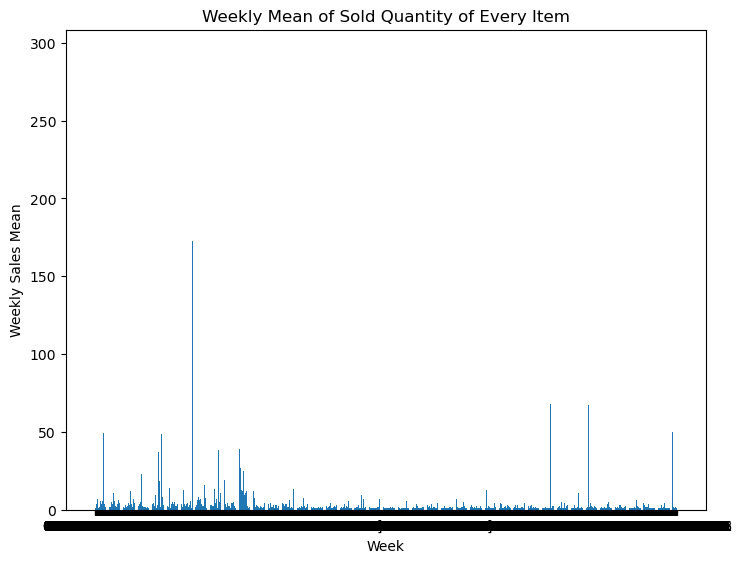

In [166]:
weekly_sales_mean_chart(item_mean_list)                                  

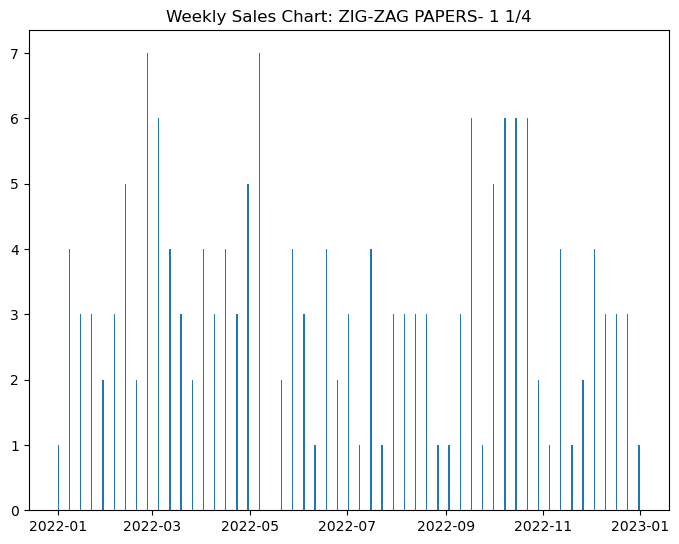

In [14]:
weekly_sales_chart('008660000026',12,week_grp_lbl,item_dict)# popular cigar

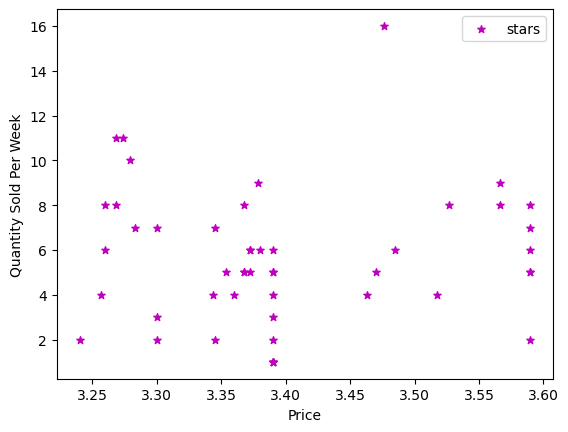

In [171]:
price_qty_chart('895216001060',week_grp_lbl,item_dict)

time
2022-01-01    13.1
2022-01-02    -1.0
2022-01-03     4.1
2022-01-04    10.4
2022-01-05    10.1
              ... 
2022-12-27     3.7
2022-12-28    15.5
2022-12-29    18.3
2022-12-30    13.2
2022-12-31    16.7
Freq: D, Name: tavg, Length: 365, dtype: float64


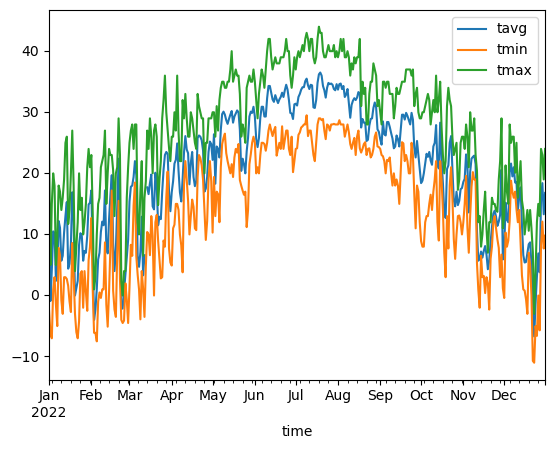

In [16]:
collect_weather_data()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

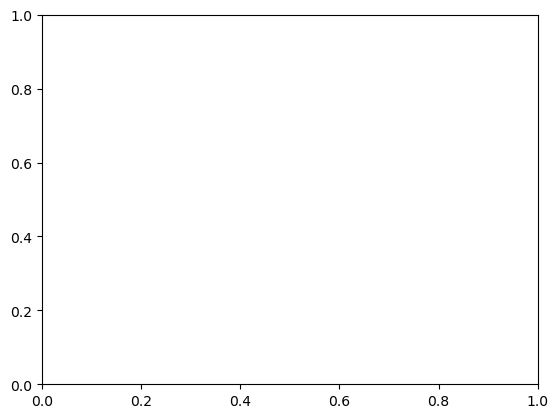

In [9]:
test()